# BANK_LOAN_DATA_ANALYSIS

In [2]:
#IMPORT THE MAIN LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the cleaned dataset
#file_path = "financial_loan_cleaned.csv"
df = pd.read_csv("financial_loan_cleaned.csv")

In [6]:
df.head()

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,GA,INDIVIDUAL,0.0,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,...,C4,60,Source Verified,30000.0,0.0100,59.83,15.27,2500,4,1009
1,CA,INDIVIDUAL,9.0,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,...,E1,36,Source Verified,48000.0,0.0535,109.43,18.64,3000,4,3939
2,CA,INDIVIDUAL,4.0,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,...,C5,36,Not Verified,50000.0,0.2088,421.65,15.96,12000,11,3522
3,TX,INDIVIDUAL,0.0,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,...,B2,60,Source Verified,42000.0,0.0540,97.06,10.65,4500,9,4911
4,IL,INDIVIDUAL,10.0,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,...,A1,36,Verified,83000.0,0.0231,106.53,6.03,3500,28,3835


In [8]:
# Convert date columns back to datetime format
date_cols = ["issue_date", "last_credit_pull_date", "last_payment_date", "next_payment_date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [10]:
df.head()

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,GA,INDIVIDUAL,0.0,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,...,C4,60,Source Verified,30000.0,0.0100,59.83,15.27,2500,4,1009
1,CA,INDIVIDUAL,9.0,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,...,E1,36,Source Verified,48000.0,0.0535,109.43,18.64,3000,4,3939
2,CA,INDIVIDUAL,4.0,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,...,C5,36,Not Verified,50000.0,0.2088,421.65,15.96,12000,11,3522
3,TX,INDIVIDUAL,0.0,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,...,B2,60,Source Verified,42000.0,0.0540,97.06,10.65,4500,9,4911
4,IL,INDIVIDUAL,10.0,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,...,A1,36,Verified,83000.0,0.0231,106.53,6.03,3500,28,3835


In [12]:
df.describe()

,emp_length,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,term,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,38576.000000,38576,38576,38576,38576,38576.000000,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,4.974829,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,42.432393,6.964454e+04,0.133274,326.862965,12.048831,11296.066855,22.132544,12263.348533
min,0.000000,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,36.000000,4.000000e+03,0.000000,15.690000,5.420000,500.000000,2.000000,34.000000
25%,2.000000,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,36.000000,4.150000e+04,0.082100,168.450000,9.320000,5500.000000,14.000000,5633.000000
50%,4.000000,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,36.000000,6.000000e+04,0.134200,283.045000,11.860000,10000.000000,20.000000,10042.000000
75%,9.000000,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,60.000000,8.320050e+04,0.185900,434.442500,14.590000,15000.000000,29.000000,16658.000000
max,10.000000,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,60.000000,6.000000e+06,0.299900,1305.190000,24.590000,35000.000000,90.000000,58564.000000
std,3.562833,NaN,NaN,NaN,NaN,10.630366,6.429368e+04,0.066662,209.092000,3.716412,7460.746022,11.392282,9051.104777


In [54]:
df.shape

(38576, 22)

In [16]:
# Total number of loans
print("Total number of loans:", df.shape[0])

Total number of loans: 38576


In [22]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   address_state          38576 non-null  object        
 1   application_type       38576 non-null  object        
 2   emp_length             38576 non-null  float64       
 3   emp_title              38576 non-null  object        
 4   grade                  38576 non-null  object        
 5   home_ownership         38576 non-null  object        
 6   issue_date             38576 non-null  datetime64[ns]
 7   last_credit_pull_date  38576 non-null  datetime64[ns]
 8   last_payment_date      38576 non-null  datetime64[ns]
 9   loan_status            38576 non-null  object        
 10  next_payment_date      38576 non-null  datetime64[ns]
 11  purpose                38576 non-null  object        
 12  sub_grade              38576 non-null  object        
 13  t

In [18]:
# Average loan amount
print("Average loan amount:", df["loan_amount"].mean())

Average loan amount: 11296.066855039402


In [20]:
# Loan status distribution
print("Loan status distribution:")
print(df["loan_status"].value_counts())

Loan status distribution:
loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64


In [34]:
avg_payment = df.groupby('loan_status')['total_payment'].mean()

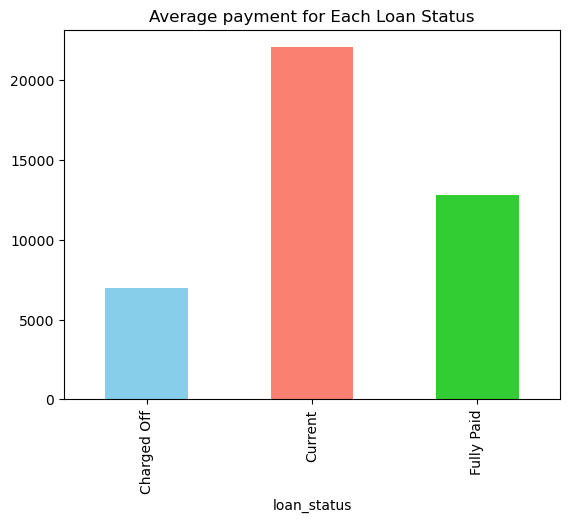

In [36]:
avg_payment.plot(kind='bar',color=['skyblue', 'salmon', 'limegreen'])
plt.title("Average payment for Each Loan Status")
#plt.xlable("Loan Status")
#plt.ylable("payment")
plt.show()

In [38]:
# Average interest rate per grade
print("Average interest rate per grade:")
print(df.groupby("grade")["int_rate"].mean())

Average interest rate per grade:
grade
A     7.351971
B    11.029088
C    13.546922
D    15.710540
E    17.705230
F    19.744008
G    21.400639
Name: int_rate, dtype: float64


In [40]:
# Top 5 states with highest total loan amounts
top_states = df.groupby("address_state")["loan_amount"].sum().sort_values(ascending=False).head(5)
print("Top 5 states with highest loan amounts:")
print(top_states)

Top 5 states with highest loan amounts:
address_state
CA    78484125
NY    42077050
TX    31236650
FL    30046125
NJ    21657475
Name: loan_amount, dtype: int64


In [42]:
# Correlation between annual income and loan amount
correlation = df[["annual_income", "loan_amount"]].corr()
print("Correlation between annual income and loan amount:")
print(correlation)

Correlation between annual income and loan amount:
               annual_income  loan_amount
annual_income       1.000000     0.268183
loan_amount         0.268183     1.000000


In [44]:
# Default rate by home ownership
default_rates = df[df["loan_status"] == "Charged Off"].groupby("home_ownership").size() / df.groupby("home_ownership").size()
print("Default rate by home ownership:")
print(default_rates)

Default rate by home ownership:
home_ownership
MORTGAGE    0.129724
NONE             NaN
OTHER       0.183673
OWN         0.139887
RENT        0.145724
dtype: float64


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


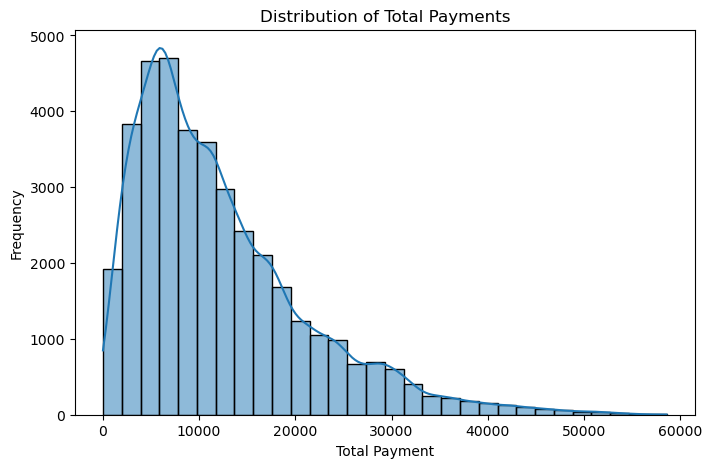

In [46]:
# Loan repayment analysis
plt.figure(figsize=(8, 5))
sns.histplot(df["total_payment"], bins=30, kde=True)
plt.title("Distribution of Total Payments")
plt.xlabel("Total Payment")
plt.ylabel("Frequency")
plt.show()


In [48]:
# Save default rates to CSV
default_rates.to_csv("default_rates_by_home_ownership.csv")

In [50]:
df.head(3)

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,GA,INDIVIDUAL,0.0,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,...,C4,60,Source Verified,30000.0,0.0100,59.83,15.27,2500,4,1009
1,CA,INDIVIDUAL,9.0,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,...,E1,36,Source Verified,48000.0,0.0535,109.43,18.64,3000,4,3939
2,CA,INDIVIDUAL,4.0,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,...,C5,36,Not Verified,50000.0,0.2088,421.65,15.96,12000,11,3522
